<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/distributiontests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribution Tests

*Author: Alexander Del Toro Barba*

# Import Libraries

In [0]:
# Import packages
import numpy as np
import sklearn
from decimal import *
from numpy import linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import collections
import datetime
import matplotlib
from scipy import stats
import scipy.stats as stats
import matplotlib.pylab as py
import matplotlib.pyplot as plt
from numpy import sqrt
from copy import copy
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import statsmodels
from statsmodels.tsa.stattools import adfuller
from numpy import log

# Distribution Plots

**QQ Plot of the residuals against quantiles of t-distribution with mean 3 and std 10**

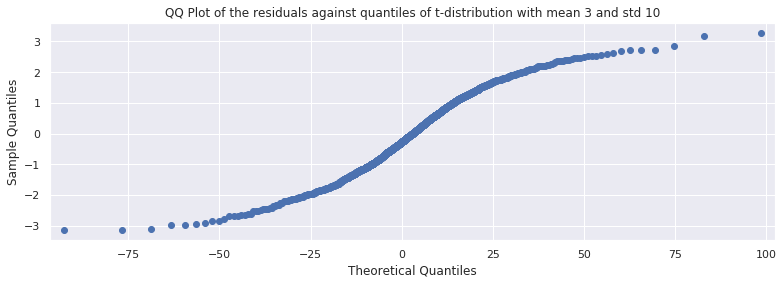

In [0]:
fig = sm.qqplot(series, stats.t, distargs=(4,), loc=3, scale=10)
plt.title('QQ Plot of the residuals against quantiles of t-distribution with mean 3 and std 10')
plt.show()

**Automatically determine parameters for t distribution including the loc and scale**

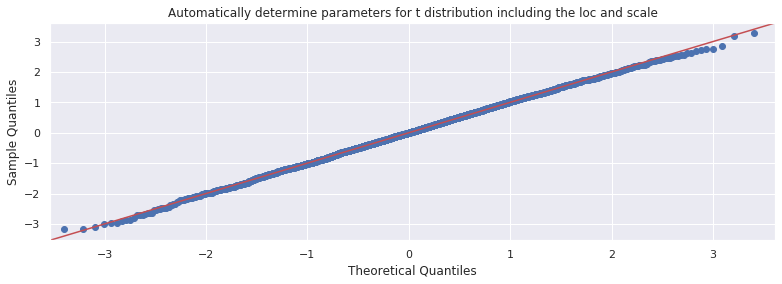

In [0]:
fig = sm.qqplot(series, stats.t, fit=True, line='45')
plt.title('Automatically determine parameters for t distribution including the loc and scale')
plt.show()

**QQ Plot - Cauchy Distribution**

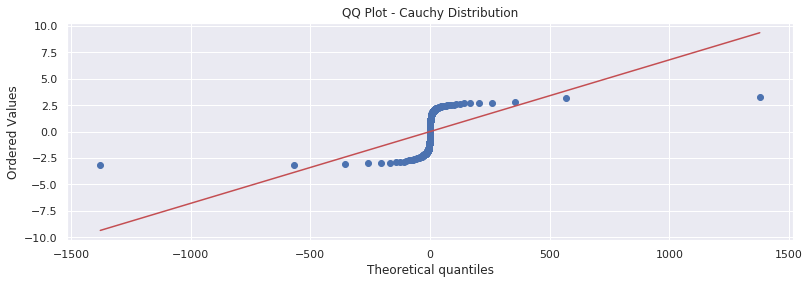

In [0]:
stats.probplot(series, dist="cauchy", plot=plt)
plt.title('QQ Plot - Cauchy Distribution')
plt.show()

**QQ Plot - Levy Distribution**

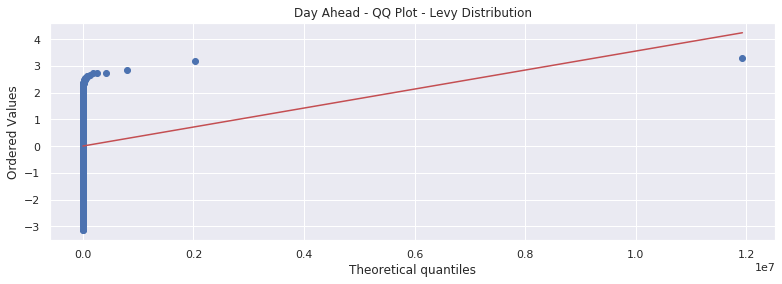

In [0]:
stats.probplot(series, dist="levy", plot=plt)
plt.title('QQ Plot - Levy Distribution')
plt.show()

# (Normal) Distribution Tests

## BDS Independence Test

In [0]:
# BDS test statistic for independence of a time series
# Time Series is IID (= Null Hypothesis)
statsmodels.tsa.stattools.bds(series, max_dim=2, epsilon=None, distance=1.5)

(array(-1.61871806), array(0.10550794))

## Kolmogorov-Smirnov Test

In [0]:
# Kolmogorov-Smirnov Test
stats.kstest(series, 'norm')

KstestResult(statistic=0.0101376809831496, pvalue=0.9174327979005003)

## Jarque-Bera Test

compares sample skewness and kurtosis to 0 and 3, their values under normality.

The Jarque-Bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.
Note that this test only works for a large enough number of data samples (>2000) as the test statistic asymptotically has a Chi-squared distribution with 2 degrees of freedom.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html

Null hypothesis: sample is normal distributed. JB(PValue<0.05)= Reject Ho (Non-Normal Distribution)

In [0]:
stats.jarque_bera(series)

## Anderson-Darling Test

Anderson Darling tests whether the sample from the population follows a particular distribution (default: normal).

In [0]:
stats.anderson(series)